In [1]:
!unrar x /content/Q5_Fashion-MNIST.rar


UNRAR 5.61 beta 1 freeware      Copyright (c) 1993-2018 Alexander Roshal


Extracting from /content/Q5_Fashion-MNIST.rar

Creating    Fashion-MNIST                                             OK
Extracting  Fashion-MNIST/testData.csv                                     0%  1%  2%  3%  4%  5%  6%  7%  8%  9% 10% 11% 12% 13% 14%  OK 
Extracting  Fashion-MNIST/testLabels.csv                                  14%  OK 
Extracting  Fashion-MNIST/trainData.csv                                   14% 15% 16% 17% 18% 19% 20% 21% 22% 23% 24% 25% 26% 27% 28% 29% 30% 31% 32% 33% 34% 35% 36% 37% 38% 39% 40% 41% 42% 43% 44% 45% 46% 47% 48% 49% 50% 51% 52% 53% 54% 55% 56% 57% 58% 59% 60% 61% 62% 63% 64% 65% 66% 67%

# LDA from scratch

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train=pd.read_csv("/content/Fashion-MNIST/trainData.csv",index_col=None,header=None)
X_test=pd.read_csv("/content/Fashion-MNIST/testData.csv",index_col=None,header=None)
y_train=pd.read_csv("/content/Fashion-MNIST/trainLabels.csv",index_col=None,header=None)
y_test=pd.read_csv("/content/Fashion-MNIST/testLabels.csv",index_col=None,header=None)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [115]:
class LDA_Imp:
    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None

    def fit(self, X, y):
        n_features = X.shape[1]
        class_labels = np.unique(y)
        mean_overall = np.mean(X, axis=0)
        SW = np.zeros((n_features, n_features))
        SB = np.zeros((n_features, n_features))
        for c in class_labels:
            indexes,_=np.where(y == c)
            X_c = X[indexes]
            mean_c = np.mean(X_c, axis=0)
            SW += (X_c - mean_c).T.dot((X_c - mean_c))
            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
            SB += n_c * (mean_diff).dot(mean_diff.T)
        A = np.linalg.inv(SW).dot(SB)
        eigenvalues, eigenvectors = np.linalg.eig(A)
        eigenvectors = eigenvectors.T
        idxs = np.argsort(abs(eigenvalues))[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        # store first n eigenvectors
        self.linear_discriminants = eigenvectors[0 : self.n_components]
        return A,eigenvalues,eigenvectors

    def transform(self, X):
        return np.dot(X, self.linear_discriminants.T).real


In [136]:
Trace_matrix

array([[ 2.70078337e-04, -1.63182463e-06,  2.55209184e-04, ...,
        -9.75197030e-04, -1.18629642e-03, -3.32073321e-04],
       [-3.07009171e-04,  1.49940293e-04, -6.92734014e-04, ...,
        -1.14709588e-04,  2.30790474e-03,  1.05695674e-03],
       [ 5.55387864e-04,  4.70118216e-04,  3.19531345e-03, ...,
        -1.35692082e-03, -4.62278675e-03, -2.20088480e-03],
       ...,
       [ 3.88050710e-04, -2.73968375e-04, -2.43984773e-05, ...,
         1.85363790e-03, -6.05166523e-04, -6.35551894e-04],
       [-2.82521245e-04, -9.53527329e-04, -1.62591930e-03, ...,
        -7.36267770e-04, -3.89146406e-04, -9.58586320e-04],
       [ 1.53309856e-05,  1.85055246e-04,  1.99895620e-04, ...,
         1.16856326e-03,  9.34558959e-04,  3.65192340e-04]])

In [119]:
lda_class = LDA_Imp(len(np.unique(y_train.values))-1)
Trace_matrix, eigenvalues, eigenvectors =lda_class.fit(X_train, y_train.values)
X_train_lda = lda_class.transform(X_train)
X_test_lda = lda_class.transform(X_test)

/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


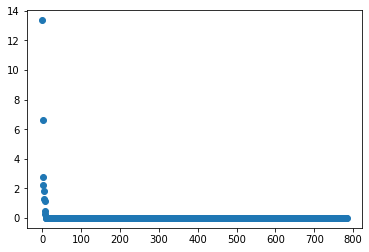

In [135]:
plt.scatter(np.arange(X_train.shape[1]),eigenvalues)

In [69]:
import matplotlib.pyplot as plt

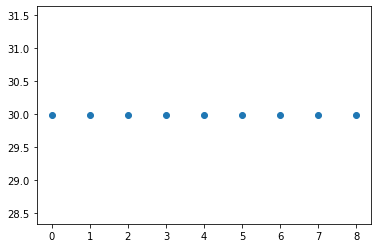

In [149]:
traces=[]
for i in range(len(np.unique(y_train.values))-1):
  lda_class = LDA_Imp(i)
  Trace_matrix, eigenvalues, eigenvectors =lda_class.fit(X_train, y_train.values)
  X_train_lda = lda_class.transform(X_train)
  X_test_lda = lda_class.transform(X_test)
  traces.append(np.trace(Trace_matrix))
plt.scatter(np.arange(len(np.unique(y_train.values))-1),traces)

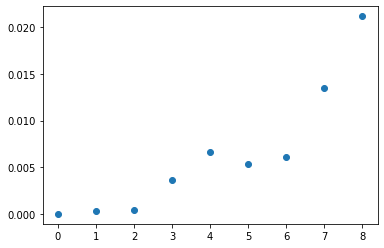

In [150]:
traces=[]
lda_class = LDA_Imp(len(np.unique(y_train.values))-1)
Trace_matrix, eigenvalues, eigenvectors =lda_class.fit(X_train, y_train.values)
X_train_lda = lda_class.transform(X_train)
X_test_lda = lda_class.transform(X_test)
for i in range(len(np.unique(y_train.values))-1):
  traces.append(np.sum(np.diagonal(Trace_matrix)[:i]))
plt.scatter(np.arange(len(np.unique(y_train.values))-1),traces)

In [122]:
from sklearn.naive_bayes import GaussianNB
gnb_lda = GaussianNB()
gnb_lda.fit(X_train_lda, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [123]:
from sklearn.metrics import classification_report
print("Train data:")
print(classification_report(gnb_lda.predict(X_train_lda), y_train))
print("*************************************************************")
print("Test data:")
print(classification_report(gnb_lda.predict(X_test_lda), y_test))

Train data:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      5980
           1       0.94      0.99      0.97      5702
           2       0.70      0.76      0.73      5540
           3       0.87      0.82      0.84      6354
           4       0.77      0.71      0.74      6511
           5       0.91      0.85      0.88      6413
           6       0.55      0.58      0.57      5648
           7       0.87      0.89      0.88      5837
           8       0.95      0.93      0.94      6153
           9       0.90      0.92      0.91      5862

    accuracy                           0.83     60000
   macro avg       0.83      0.83      0.83     60000
weighted avg       0.83      0.83      0.83     60000

*************************************************************
Test data:
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       987
           1       0.94      0.99      0.96    

In [125]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 

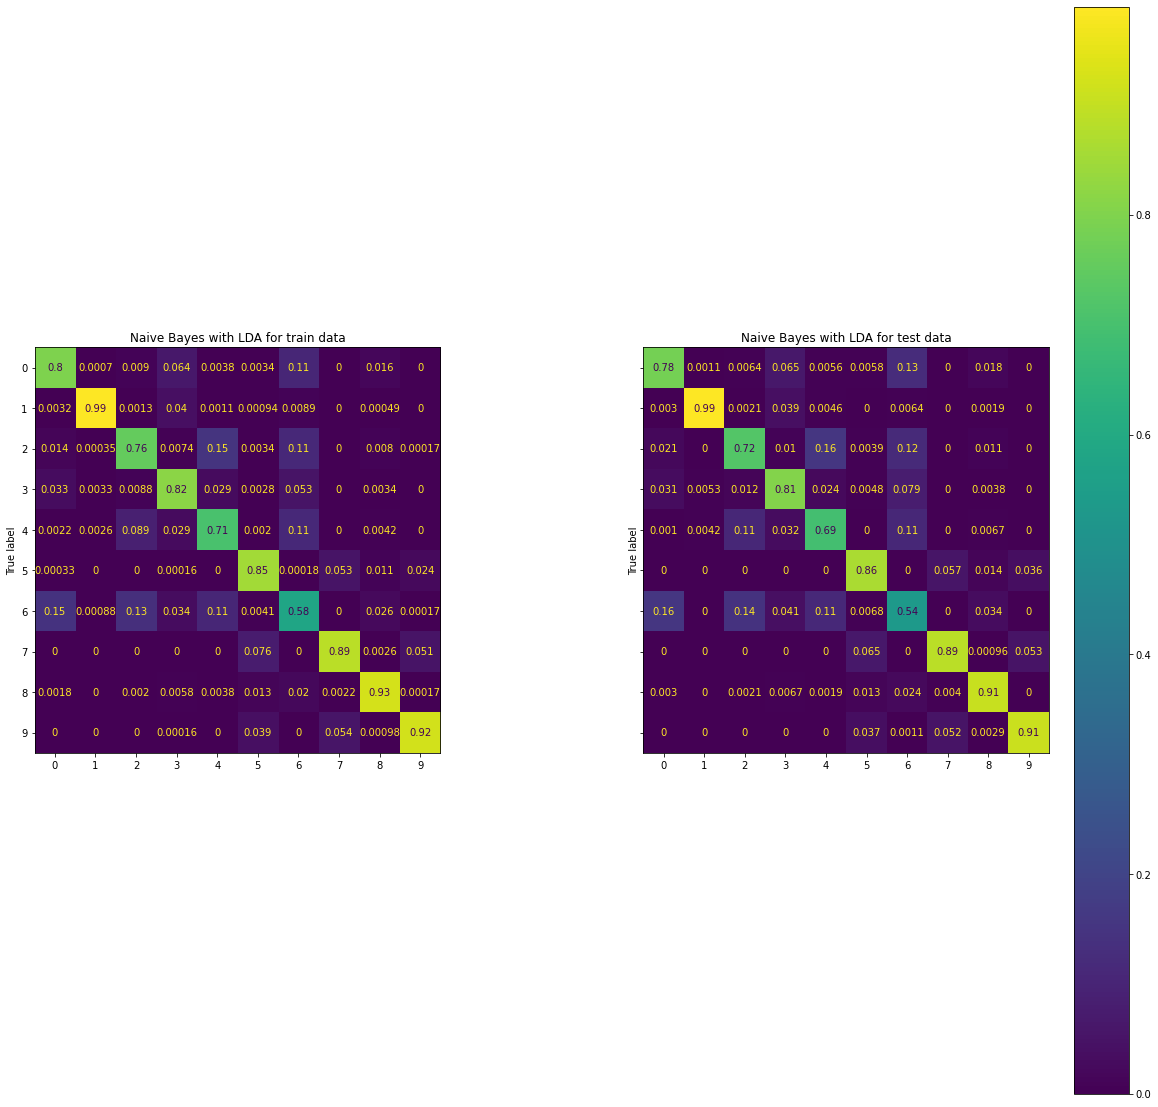

In [126]:
f, axarr = plt.subplots(1, 2, sharex="col", sharey="row", figsize=(20, 20))
data=[X_train_lda,X_test_lda]
labels=[y_train,y_test]
tt=["Naive Bayes with LDA for train data","Naive Bayes with LDA for test data"]
for i in range(2):
  y_pred=gnb_lda.predict(data[i])
  result = confusion_matrix(labels[i], y_pred , normalize='pred' )
  disp = ConfusionMatrixDisplay(confusion_matrix=result)
  disp.plot(ax= axarr[i])
  disp.ax_.set_title(tt[i])
  disp.ax_.set_xlabel('')
  if i==0:
    disp.im_.colorbar.remove()

In [127]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [128]:
from sklearn.metrics import classification_report
print("Train data:")
print(classification_report(gnb.predict(X_train), y_train))
print("*************************************************************")
print("Test data:")
print(classification_report(gnb.predict(X_test), y_test))

Train data:
              precision    recall  f1-score   support

           0       0.60      0.83      0.70      4327
           1       0.95      0.57      0.71     10103
           2       0.31      0.60      0.41      3130
           3       0.44      0.42      0.43      6379
           4       0.76      0.37      0.50     12410
           5       0.25      0.92      0.40      1657
           6       0.04      0.33      0.07       743
           7       0.98      0.49      0.66     11901
           8       0.72      0.85      0.78      5058
           9       0.65      0.91      0.76      4292

    accuracy                           0.57     60000
   macro avg       0.57      0.63      0.54     60000
weighted avg       0.73      0.57      0.60     60000

*************************************************************
Test data:
              precision    recall  f1-score   support

           0       0.58      0.82      0.68       707
           1       0.95      0.58      0.72    

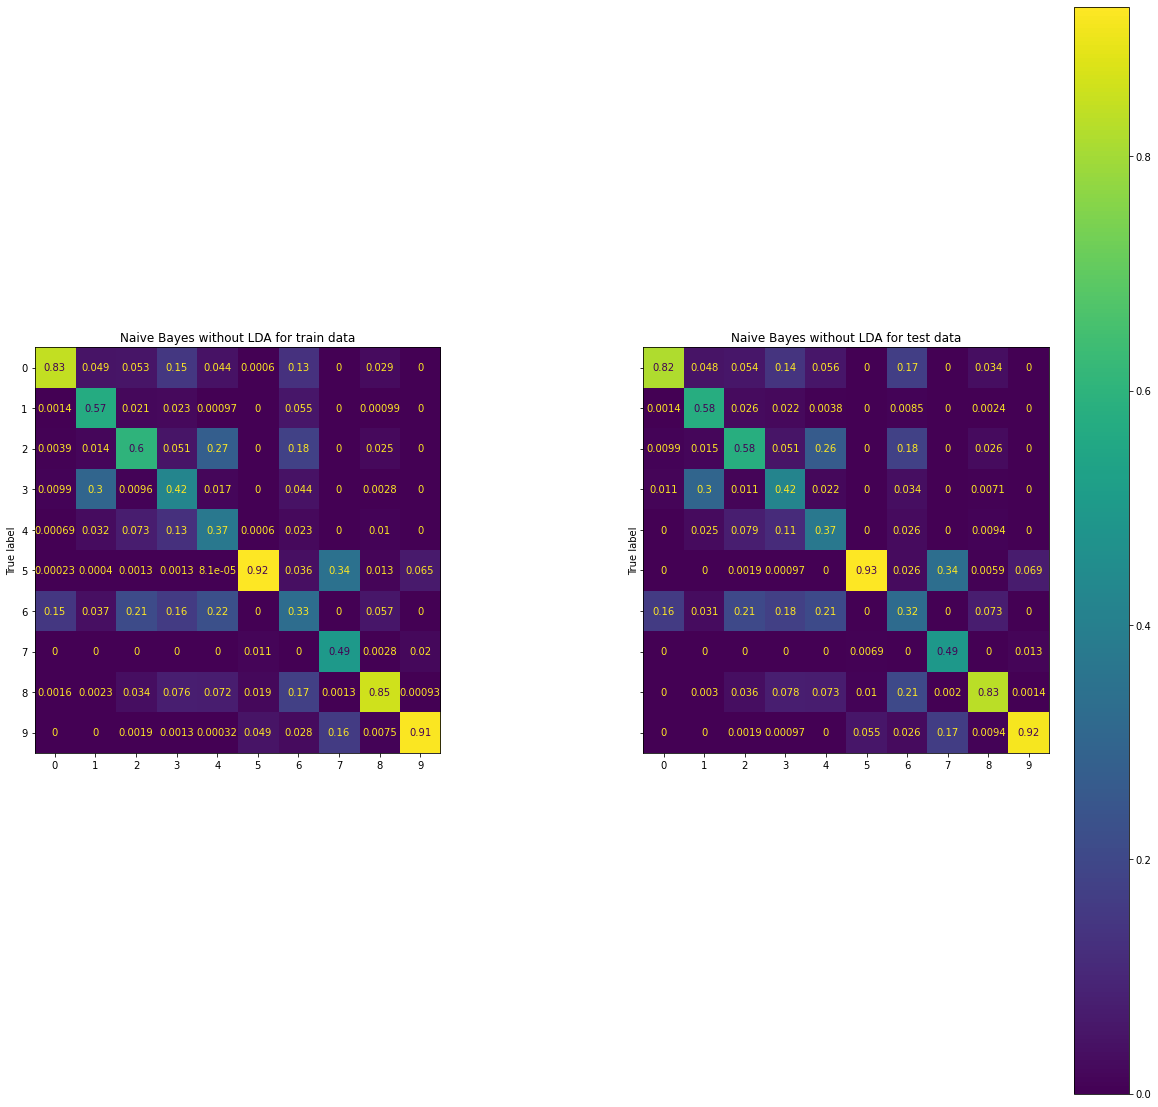

In [129]:
f, axarr = plt.subplots(1, 2, sharex="col", sharey="row", figsize=(20, 20))
data=[X_train,X_test]
labels=[y_train,y_test]
tt=["Naive Bayes without LDA for train data","Naive Bayes without LDA for test data"]
for i in range(2):
  y_pred=gnb.predict(data[i])
  result = confusion_matrix(labels[i], y_pred , normalize='pred' )
  disp = ConfusionMatrixDisplay(confusion_matrix=result)
  disp.plot(ax= axarr[i])
  disp.ax_.set_title(tt[i])
  disp.ax_.set_xlabel('')
  if i==0:
    disp.im_.colorbar.remove()

# With use of Sklearn

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 

In [ ]:
X_train=pd.read_csv("/content/Fashion-MNIST/trainData.csv",index_col=None,header=None)
X_test=pd.read_csv("/content/Fashion-MNIST/testData.csv",index_col=None,header=None)
y_train=pd.read_csv("/content/Fashion-MNIST/trainLabels.csv",index_col=None,header=None)
y_test=pd.read_csv("/content/Fashion-MNIST/testLabels.csv",index_col=None,header=None)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train.values)
X_test = sc.transform(X_test.values)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(solver="eigen")
X_train_lda = lda.fit_transform(X_train, y_train.values)
X_test_lda = lda.transform(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


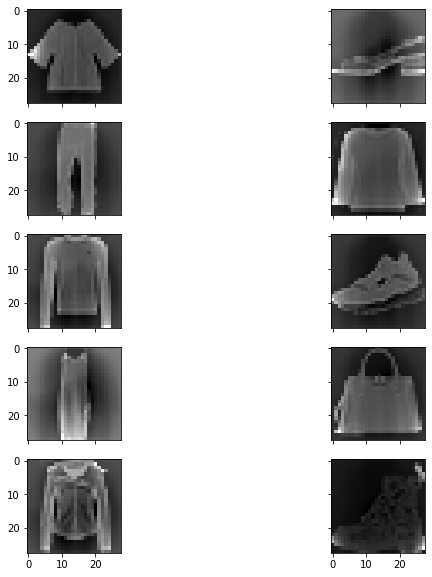

In [ ]:
import random
f, axarr = plt.subplots(5, 2, sharex="col", sharey="row", figsize=(10, 10))
for i in range(10):
  indexes= np.where(y_train.values == i)[0]
  random.seed(500)
  img_index=random.choice(indexes)
  if(i>4):
    x=i-5
    img=255*X_train[img_index].reshape(28,28)
    axarr[x,1].imshow(img,cmap='gray')
  else:
    img=255*X_train[img_index].reshape(28,28)
    axarr[i,0].imshow(img,cmap='gray')

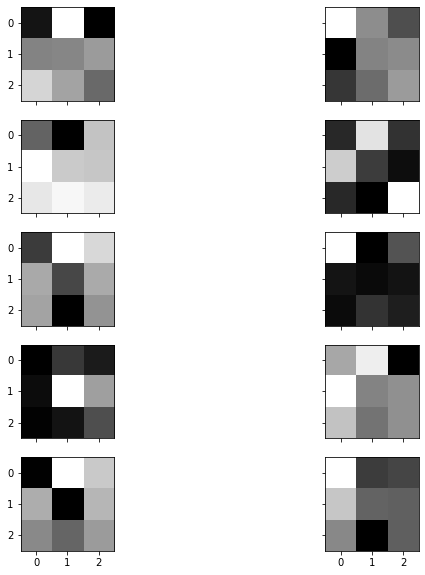

In [ ]:
import random

f, axarr = plt.subplots(5, 2, sharex="col", sharey="row", figsize=(10, 10))
for i in range(10):
  indexes= np.where(y_train.values == i)[0]
  random.seed(500)
  img_index=random.choice(indexes)
  img=255*X_train_lda[img_index].reshape(3,3)
  if(i>4):
    x=i-5
    axarr[x,1].imshow(img,cmap='gray')
  else:
    axarr[i,0].imshow(img,cmap='gray')

In [ ]:
gnb_lda = GaussianNB()
gnb_lda.fit(X_train_lda, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
from sklearn.metrics import classification_report
print("Train data:")
print(classification_report(gnb_lda.predict(X_train_lda), y_train))
print("*************************************************************")
print("Test data:")
print(classification_report(gnb_lda.predict(X_test_lda), y_test))


Train data:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      5980
           1       0.94      0.99      0.97      5702
           2       0.70      0.76      0.73      5540
           3       0.87      0.82      0.84      6354
           4       0.77      0.71      0.74      6511
           5       0.91      0.85      0.88      6413
           6       0.55      0.58      0.57      5648
           7       0.87      0.89      0.88      5837
           8       0.95      0.93      0.94      6153
           9       0.90      0.92      0.91      5862

    accuracy                           0.83     60000
   macro avg       0.83      0.83      0.83     60000
weighted avg       0.83      0.83      0.83     60000

*************************************************************
Test data:
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       987
           1       0.94      0.99      0.96    

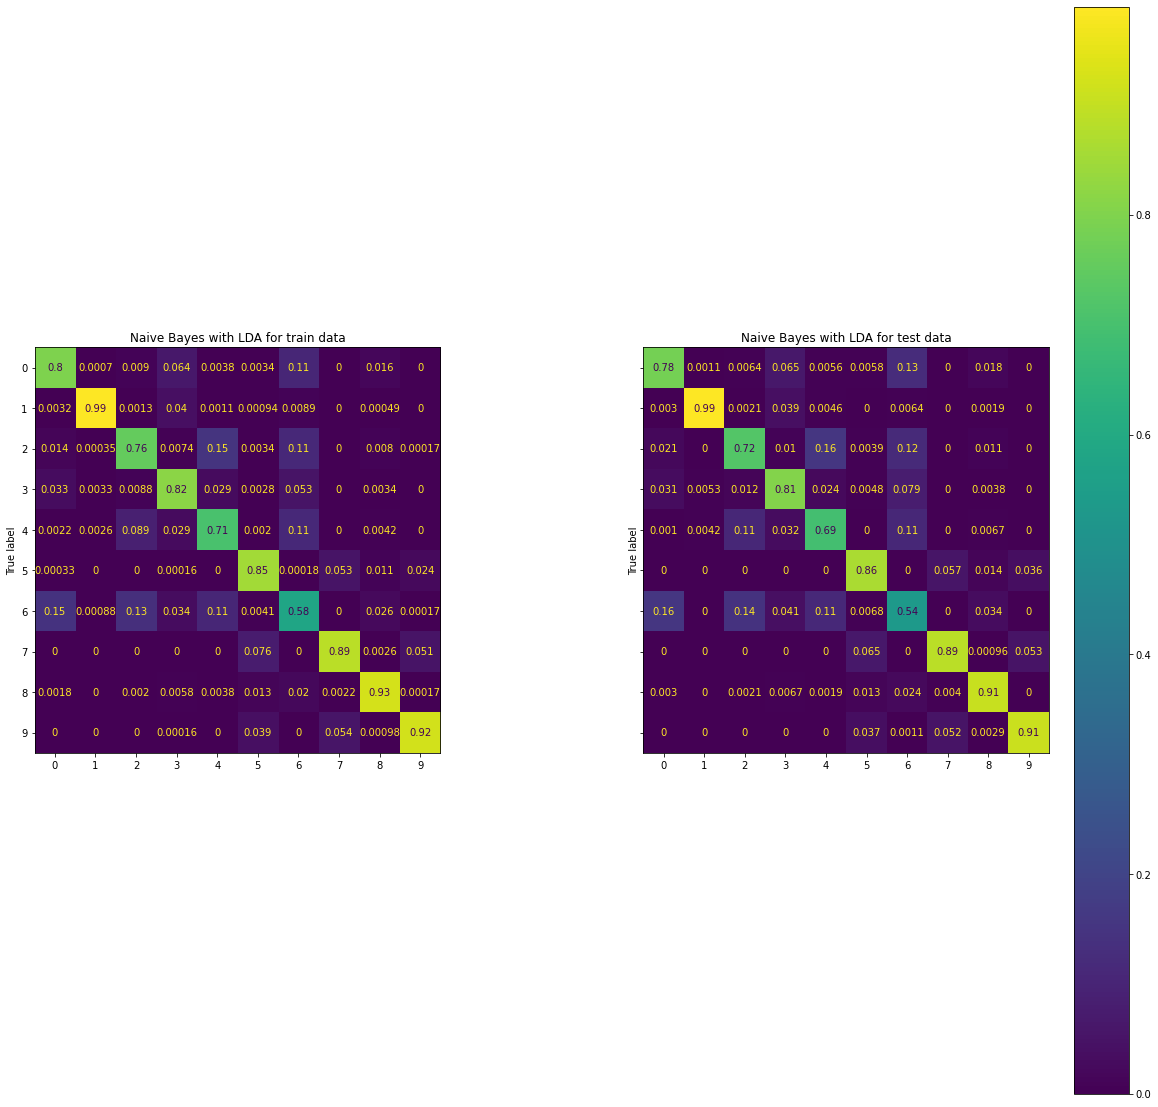

In [ ]:
f, axarr = plt.subplots(1, 2, sharex="col", sharey="row", figsize=(20, 20))
data=[X_train_lda,X_test_lda]
labels=[y_train,y_test]
tt=["Naive Bayes with LDA for train data","Naive Bayes with LDA for test data"]
for i in range(2):
  y_pred=gnb_lda.predict(data[i])
  result = confusion_matrix(labels[i], y_pred , normalize='pred' )
  disp = ConfusionMatrixDisplay(confusion_matrix=result)
  disp.plot(ax= axarr[i])
  disp.ax_.set_title(tt[i])
  disp.ax_.set_xlabel('')
  if i==0:
    disp.im_.colorbar.remove()
    

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
from sklearn.metrics import classification_report
print("Train data:")
print(classification_report(gnb.predict(X_train), y_train))
print("*************************************************************")
print("Test data:")
print(classification_report(gnb.predict(X_test), y_test))

Train data:
              precision    recall  f1-score   support

           0       0.60      0.83      0.70      4327
           1       0.95      0.57      0.71     10103
           2       0.31      0.60      0.41      3130
           3       0.44      0.42      0.43      6379
           4       0.76      0.37      0.50     12410
           5       0.25      0.92      0.40      1657
           6       0.04      0.33      0.07       743
           7       0.98      0.49      0.66     11901
           8       0.72      0.85      0.78      5058
           9       0.65      0.91      0.76      4292

    accuracy                           0.57     60000
   macro avg       0.57      0.63      0.54     60000
weighted avg       0.73      0.57      0.60     60000

*************************************************************
Test data:
              precision    recall  f1-score   support

           0       0.58      0.82      0.68       707
           1       0.95      0.58      0.72    

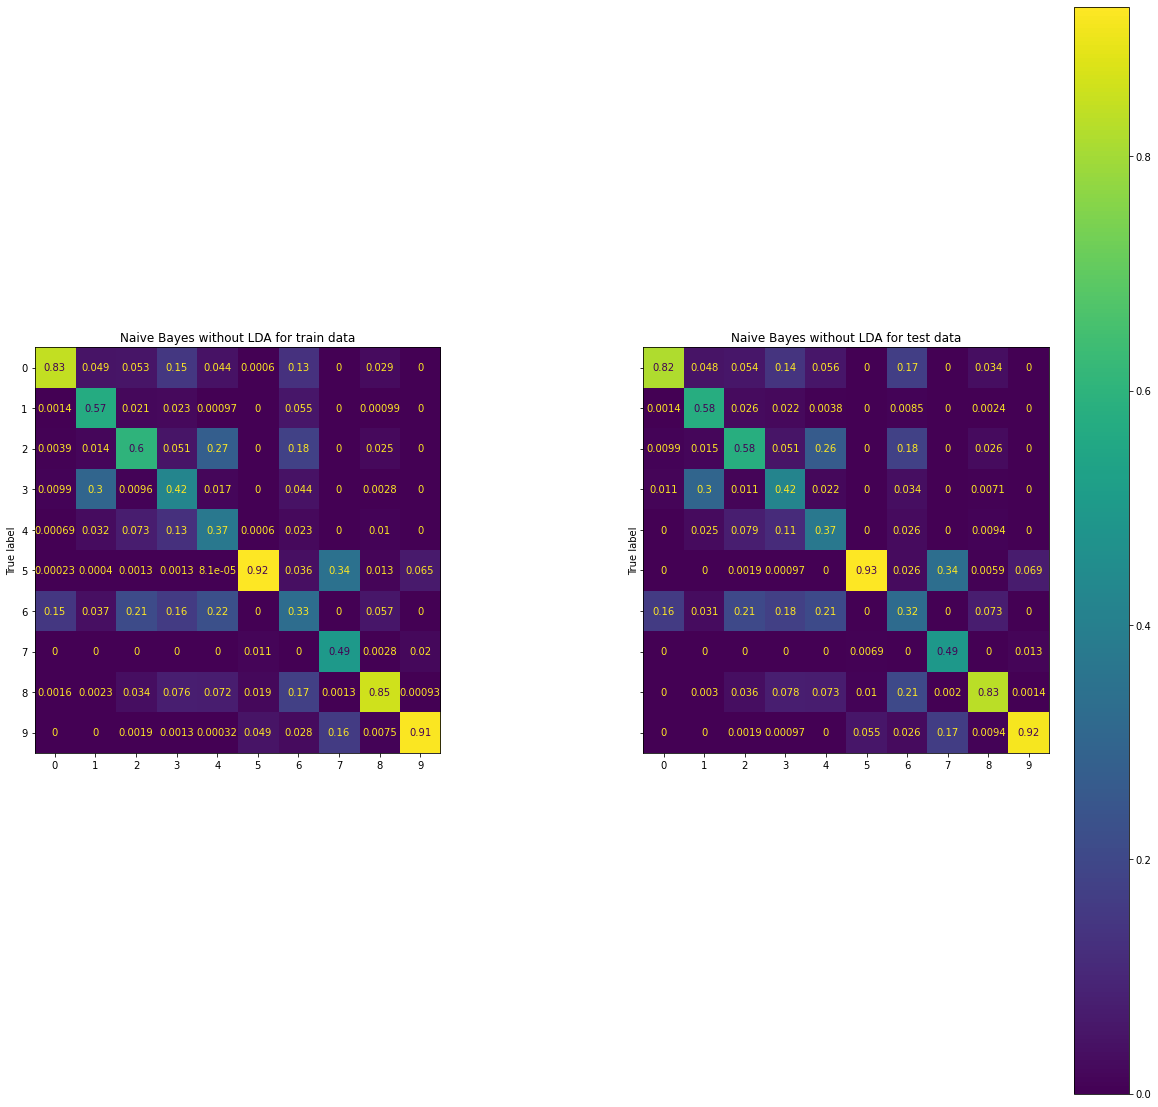

In [ ]:
f, axarr = plt.subplots(1, 2, sharex="col", sharey="row", figsize=(20, 20))
data=[X_train,X_test]
labels=[y_train,y_test]
tt=["Naive Bayes without LDA for train data","Naive Bayes without LDA for test data"]
for i in range(2):
  y_pred=gnb.predict(data[i])
  result = confusion_matrix(labels[i], y_pred , normalize='pred' )
  disp = ConfusionMatrixDisplay(confusion_matrix=result)
  disp.plot(ax= axarr[i])
  disp.ax_.set_title(tt[i])
  disp.ax_.set_xlabel('')
  if i==0:
    disp.im_.colorbar.remove()